<a href="https://colab.research.google.com/github/nikhilbansal23/Fraudsters-Detection/blob/main/Fraudsters_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#imposting libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl

In [2]:
countries = pd.read_csv("/content/drive/MyDrive/Datasets/Revoluts Fraudsters Detection/countries.csv")
currency_details = pd.read_csv("/content/drive/MyDrive/Datasets/Revoluts Fraudsters Detection/currency_details.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Datasets/Revoluts Fraudsters Detection/transactions.csv")
users = pd.read_csv("/content/drive/MyDrive/Datasets/Revoluts Fraudsters Detection/users.csv")


In [14]:
#this stops data truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [36]:
print("Total records in users data frame " + str(len(users)))
print("Total records in transaction data frame " + str(len(transactions)))
print("Total records in countries data frame " + str(len(countries)))
print("Total records in currency_details data frame " + str(len(currency_details)))


Total records in users data frame 9944
Total records in transaction data frame 688651
Total records in countries data frame 226
Total records in currency_details data frame 184


Stiching Data Together

In [9]:
cust = users.merge(transactions,left_on = 'ID',right_on='USER_ID',how='inner')

In [17]:
cust = cust.merge(countries,left_on = 'COUNTRY',right_on='CODE',how='inner')

In [22]:
customer_data =  cust.merge(currency_details,left_on = 'CURRENCY',right_on='CCY',how='inner')

In [38]:
#user status - STATE_x user_state
#transaction status - STATE_y transaction_state
# user id - ID_x	user_id
# transaction id - ID_y transaction_id
# user creation date - CREATED_DATE_x user_creation_date
# transaction create date - CREATED_DATE_y transaction_creation_date

cols_rename = {'STATE_x' : 'user_state', "STATE_y":"transaction_state", "ID_x":'user_id',"ID_y":"transaction_id","CREATED_DATE_x":"user_creation_date","CREATED_DATE_y":"transaction_creation_date"}
customer_data.rename(columns= cols_rename,inplace=True)

In [40]:
#lowercasing dataframe headers
customer_data.columns = [x.lower() for x in customer_data.columns]

In [42]:
# reducing columns - code,ccy
customer_data.drop(['code','ccy'], axis=1, inplace = True)

In [46]:
print("Combined dataframes column count is " +str(len(customer_data.columns)))

Combined dataframes column count is 29


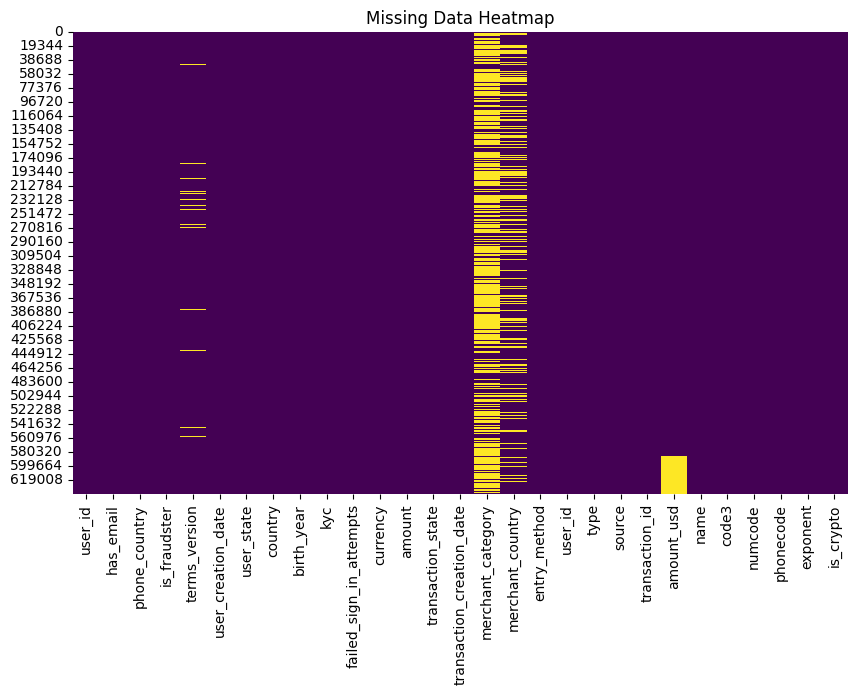

In [51]:
missing_data = customer_data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(customer_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [59]:
print("More than 50% of values are null in Merchant country  " + str("{:.2%}".format((customer_data['merchant_category'].isnull().sum()/len(customer_data)))))


More than 50% of values are null in Merchant country  67.33%


In [ ]:
(customer_data['amount_usd'].isnull().sum()/len(customer_data))*100

In [43]:
customer_data.head(5)

,user_id,has_email,phone_country,is_fraudster,terms_version,user_creation_date,user_state,country,birth_year,kyc,failed_sign_in_attempts,currency,amount,transaction_state,transaction_creation_date,merchant_category,merchant_country,entry_method,user_id,type,source,transaction_id,amount_usd,name,code3,numcode,phonecode,exponent,is_crypto
0,1872820f-e3ac-4c02-bdc7-727897b60043,1,GB||JE||IM||GG,False,2018-05-25,2017-08-06 07:33:33.341000,ACTIVE,GB,1971,PASSED,0,GBP,50000,COMPLETED,2018-05-31 17:26:00.205,NaN,NaN,misc,1872820f-e3ac-4c02-bdc7-727897b60043,TOPUP,HERA,29df55ae-accd-47c2-85f6-ed499703b75d,37130.0,United Kingdom,gBR,826,44,2,False
1,1872820f-e3ac-4c02-bdc7-727897b60043,1,GB||JE||IM||GG,False,2018-05-25,2017-08-06 07:33:33.341000,ACTIVE,GB,1971,PASSED,0,GBP,1000,COMPLETED,2017-08-12 12:17:40.762,NaN,NaN,misc,1872820f-e3ac-4c02-bdc7-727897b60043,TOPUP,HERA,1a050680-bb84-436f-a93b-79b7e75775db,749.0,United Kingdom,gBR,826,44,2,False
2,1872820f-e3ac-4c02-bdc7-727897b60043,1,GB||JE||IM||GG,False,2018-05-25,2017-08-06 07:33:33.341000,ACTIVE,GB,1971,PASSED,0,GBP,100,REVERTED,2017-08-12 12:17:31.607,NaN,NaN,misc,1872820f-e3ac-4c02-bdc7-727897b60043,TOPUP,HERA,826381fe-8248-4616-993d-ceb52fb04807,74.0,United Kingdom,gBR,826,44,2,False
3,545ff94d-66f8-4bea-b398-84425fb2301e,1,GB||JE||IM||GG,False,2018-01-01,2017-03-07 10:18:59.427000,ACTIVE,GB,1982,PASSED,0,GBP,500,COMPLETED,2018-07-03 14:05:18.666,NaN,NaN,misc,545ff94d-66f8-4bea-b398-84425fb2301e,P2P,INTERNAL,40ad821f-db81-4f8f-b7c6-6d7acc50e836,376.0,United Kingdom,gBR,826,44,2,False
4,545ff94d-66f8-4bea-b398-84425fb2301e,1,GB||JE||IM||GG,False,2018-01-01,2017-03-07 10:18:59.427000,ACTIVE,GB,1982,PASSED,0,GBP,499,COMPLETED,2018-07-03 14:04:11.554,NaN,NaN,misc,545ff94d-66f8-4bea-b398-84425fb2301e,P2P,INTERNAL,b0c2b678-fe57-4ced-b03c-43178c5834bd,375.0,United Kingdom,gBR,826,44,2,False
